In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', 15)

In [2]:
# ------------------------- Load data ----------------------------

In [3]:
# load bitcoin scaled data
bitcoin_scale = pd.read_csv ('/home/sunny/NWU/EECS349/Bitcoin_Price_Predictor/data/bitcoin_price_scaled.csv', \
                       parse_dates = True, index_col = [0])

In [4]:
# check data
bitcoin_scale

,Open,Volume,Market Cap,Close
0,-0.465778,-0.302261,-0.455671,-0.464142
1,-0.464861,-0.302261,-0.455057,-0.465361
2,-0.463872,-0.302261,-0.454395,-0.465631
3,-0.464031,-0.302261,-0.454491,-0.464932
4,-0.464559,-0.302261,-0.454831,-0.465236
5,-0.464175,-0.302261,-0.454567,-0.463707
6,-0.464037,-0.302261,-0.454467,-0.464369
...,...,...,...,...
1746,2.439860,1.927741,2.464486,2.701065
1747,2.436451,2.248272,2.461413,2.927780


In [5]:
# ----------------------- Data preparation --------------------------

In [6]:
# shuffle the data
np.random.seed(0)
shuffle_indices = np.random.permutation(np.arange(0, bitcoin_scale.shape[0]))
bitcoin_scale_shuffle = bitcoin_scale.iloc[shuffle_indices]
# split data into training set and testing set (9:1)
split = int(0.9 * bitcoin_scale.shape[0])
train_data = bitcoin_scale_shuffle[0 : split]
test_data = bitcoin_scale_shuffle[split :]

In [7]:
# extract input and output training set
x_train = train_data[['Open', 'Volume', 'Market Cap']]
y_train = train_data[['Close']]

# extract input and output test set
x_test = test_data[['Open', 'Volume', 'Market Cap']]
y_test = test_data[['Close']]

In [8]:
# ---------------------- Ridge regression --------------------------

In [9]:
# calculate the mean squared error
clf = Ridge(alpha = 1.0)
result = clf.fit(x_train, y_train)
y_predict = result.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_predict)
print("The mean squared error is", str(mse_ridge))

The mean squared error is 0.012684707084984807


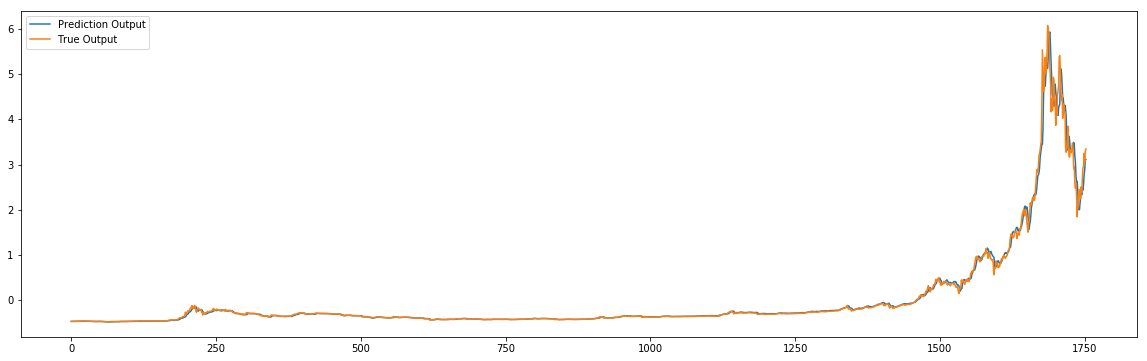

In [10]:
# plot the data by using original (unshuffled) data
# use original data on trained model
y_prediction= result.predict(bitcoin_scale[['Open', 'Volume', 'Market Cap']])
y_test = bitcoin_scale[['Close']]

plt.figure(figsize = (20, 6))
plt.plot(y_prediction, label = 'Prediction Output')
plt.plot(y_test, label = 'True Output')
plt.legend(loc = 'best')
plt.show()